## Preface



First, load relevant dataset:



In [1]:
!pip install CFEDemands
import cfe

r = cfe.from_dataset('./TanzanianNPS/tanzanian_nps.ds')


Also, choose reference prices:



In [2]:
x = 10690 # Budget

# Note selection of prices for 2008 for market 1
p = r.prices.sel(t=2008,m=1).copy()

p.to_dataframe().fillna(1).squeeze()

,t,m,prices
i,,,
Beef Including Minced Sausage,2008,1,2600.000000
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",2008,1,1.142857
Bread,2008,1,1.500000
"Buns, Cakes And Biscuits",2008,1,1.666667
Cassava Fresh,2008,1,5.000000
Chicken And Other Poultry,2008,1,6.000000
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",2008,1,0.666667
Coconuts (Mature/Immature),2008,1,0.681818
"Cooking Bananas, Plantains",2008,1,0.976190


And with $(x,p)$ defined we can calculate example demands:



In [3]:
c=r.demands(x,p)
c

i
Beef Including Minced Sausage                                  0.069502
Bottled/Canned Soft Drinks (Soda, Juice, Water)              471.323983
Bread                                                         71.508434
Buns, Cakes And Biscuits                                     112.104706
Cassava Fresh                                                  6.449252
Chicken And Other Poultry                                     60.000869
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            1585.498606
Coconuts (Mature/Immature)                                    93.910120
Cooking Bananas, Plantains                                   197.061746
Cooking Oil                                                   90.549566
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)            63.733597
Eggs                                                           0.503373
Fresh Fish And Seafood (Including Dagaa)                     421.196561
Fresh Milk                                                    

Finally, define a function to change a single price in the vector $p$:



In [4]:
def my_prices(p0,p=p,i='Ripe Bananas'):
    p = p.copy()
    p.loc[i] = p0
    return p


## Mapping to Nutrients



We&rsquo;ve seen how to map prices and budgets into vectors of consumption
quantities using `cfe.Result.demands`.  Next we want to think about
how to map these into bundles of *nutrients*.  The information needed
for the mapping comes from a &ldquo;Food Conversion Table&rdquo; (or database,
such as the [USDA Nutrition DataBase](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md)).   Here we&rsquo;ve adapted (with
thanks to Alessandro Tarozzi of the Universitat Pompeu Fabra) a food
conversion table developed by Gopalan et al (1980) to the foods
reported in the Indian ICRISAT data:



In [5]:
import pandas as pd
fct = pd.read_pickle('./TanzanianNPS/fct.df')

# Change some labels
d={'protein g':'Protein',
   'energy kcal':'Calories',
   'ca mg':'Calcium',
   'fe mg':'Iron',
   'zn mg': 'Zinc',
   'mg mg': 'Magnesium',
   'vit a ug':'Vitamin A',
  'vit e ug':'Vitamin E',
  'vit c mg':"Vitamin C",
  'vit b6 mg':'Vitamin B6',
   'vit b12 ug':'Vitamin B12'}

fct = fct.rename(columns=d)[list(d.values())]
#fct.index = fct.index.droplevel('unit')
fct = fct.rename(index={'Bread, white':'Bread'})
fct

,Protein,Calories,Calcium,Iron,Zinc,Magnesium,Vitamin A,Vitamin E,Vitamin C,Vitamin B6,Vitamin B12
Item name,,,,,,,,,,,
Rice (Paddy),6.5,358.0,8.0,0.6,1.1,36.0,0.0,0.0,0.0,0.1,0.0
Rice (Husked) (white grain raw),6.5,358.0,8.0,0.6,1.1,36.0,0.0,0.0,0.0,0.1,0.0
"Maize (Green, Cob, immature)",1.8,59.0,1.0,0.3,0.3,18.0,7.0,0.0,3.0,0.0,0.0
"Maize (Grain, dry, raw)",8.1,362.0,6.0,3.5,1.8,127.0,0.0,1.0,0.0,0.3,0.0
"Maize (Flour, dry)",8.1,362.0,6.0,3.5,1.8,127.0,0.0,1.0,0.0,0.3,0.0
Millet and Sorghum (Grain),6.6,328.0,275.0,2.7,1.2,27.0,5.0,0.0,0.0,0.2,0.0
Millet and Sorghum (Flour),6.6,328.0,275.0,2.7,1.2,27.0,5.0,0.0,0.0,0.2,0.0
Bread,8.0,274.0,10.0,0.5,0.9,27.0,0.0,0.0,0.0,0.0,0.0
Cake,4.7,320.0,38.0,0.4,0.4,9.0,34.0,1.0,0.0,0.0,0.2


We need the index of the Food Conversion Table (FCT) to match up with
the index of the vector of quantities demanded.   To manage this we
make use of the `align` method for `pd.DataFrames`:



In [6]:
# Index of fct includes names of goods and also units.  Drop the latter:
try:
    fct.index = fct.index.droplevel('unit')
except AttributeError: pass # not a multiindex?

# Create a new FCT and vector of consumption that only share rows in common:
fct0,c0 = fct.align(c,axis=0,join='inner')   #align method is taking object fct and a series of demand c to make an inter join of two things
print(fct0.index)

Index(['Bread', 'Sugar', 'Ripe Bananas', 'Sugarcane', 'Eggs', 'Salt'], dtype='object')


Now, since rows of `fct0` and `c0` match, we can obtain nutritional
outcomes from the inner (or dot, or matrix) product of the transposed
`fct0` and `c0`:



In [18]:
# The @ operator means matrix multiply
N = fct0.T@c0   #TRANSPOSE FOOD CONVERSION TABLE  AND MULTIPLIED BY VECTOR OF DEMANDS
N  # N is the vector of nutritions.

#this is for household. #nutritional requirements is individual.


Protein         1358.838860
Calories       89774.426810
Calcium         4995.581293
Iron             262.214340
Zinc             206.706788
Magnesium      21225.989987
Vitamin A       2527.113721
Vitamin E         71.652803
Vitamin C       6146.206968
Vitamin B6       282.785578
Vitamin B12        4.077320
dtype: float64

Of course, since we can compute the nutritional content of a vector of
consumption goods `c0`, we can also use our demand functions to
compute nutrition as a *function* of prices and budget.



In [8]:
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N



\

With this `nutrient_demand` function in hand, we can see how nutrient
outcomes vary with budget, given prices:



In [9]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(200,13000,2000)

UseNutrients = ['Protein','Calories','Zinc','Iron','Vitamin C','Calcium','Magnesium','Vitamin A','Vitamin E','Vitamin B6','Vitamin B12']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('Log Nutrient')

#engel curve for diff nutritions. 

Now how does nutrition vary with prices?



In [10]:
P = np.linspace(.1,13000,50)

x = p.loc["Mangoes, Avocadoes And Other Fruits"]

plt.plot(P,pd.concat({p0:np.log(nutrient_demand(x,my_prices(p0,i='Mangoes, Avocadoes And Other Fruits')))[UseNutrients] for p0 in P},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Price')
plt.ylabel('log nutrient')


#as price increases, nutritional outcome decreases.

## Nutritional requirements



Individuals have nutritional requirements established by nutrition
scientists.  Here are some standards established by the Indian
National Institute of Nutrition:



### Nutritional needs of individuals



| Sex-Age|Calories|Protein|Fat|Calcium|Iron|Betacarotene|Thiamine|Riboflavin|Niacin|Ascorbic Acid|
|---|---|---|---|---|---|---|---|---|---|---|
| C 0-0.5||||500|||.2|.3||25|
| C 0.5-1|||19|500|5|2800|.3|.4||25|
| C 1-3|1060|16.7|27|600|9|3200|.5|.6|8|40|
| C 4-6|1350|20.1|25|600|13|3200|.7|.8|11|40|
| C 7-9|1690|29.5|30|600|16|4800|.8|1.|13|40|
| B 10-12|2190|39.9|35|800|21|4800|1.1|1.3|15|40|
| G 10-12|2010|40.4|35|800|27|4800|1.|1.2|13|40|
| B 13-15|2750|54.3|45|800|32|4800|1.4|1.6|16|40|
| G 13-15|2330|51.9|40|800|27|4800|1.2|1.4|14|40|
| B 16-17|3020|61.5|50|800|28|4800|1.5|1.8|17|40|
| G 16-17|2440|55.5|35|800|26|4800|1.|1.2|14|40|
| M|2730|60|30|600|17|4800|1.4|1.4|18|40|
| W|2230|55|25|1200|21|4800|1.1|1.3|14|40|



In [11]:
#rda=pd.DataFrame([x[1:] for x in RDA[1:]],columns=RDA[0][1:],index=[x[0] for x in RDA[1:]])
#rda.to_pickle('rda.df') #this does not work

### Nutritional Needs of Households



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in the Tanzanian villages, the number of
different kinds of people can be computed by averaging over households:



In [12]:
# In 2008, averaged over households and villages
zbar = r.z.sel(t=2008).mean(['j','m'])[:-1]
zbar.to_dataframe()


Now, the inner/dot/matrix product between `zbar` and the `rda`
DataFrame of requirements will give us 

Minimum nutrition requirements for the
average household:

In [13]:
rda = pd.read_pickle('TanzanianNPS/rda.df')
# This matrix product gives minimum nutrient requirements for average household in 2008
hh_rda = rda.replace('',0).T@zbar 
hh_rda



## Nutritional Adequacy of Food Demands



Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet.



In [14]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda  #vector of total nutrients divide by minimum household rda(nutrition req)
#if more than one, adequate. # if less than one, not adequate.
nutrient_adequacy_ratio(x,p)*1000000

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.



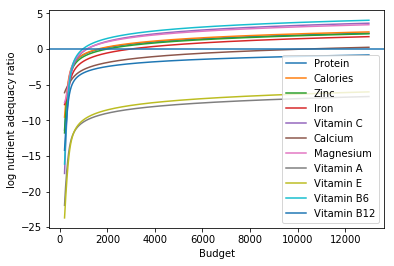

In [19]:
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)


As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of Mangoes, Avocadoes and Other Fruits:



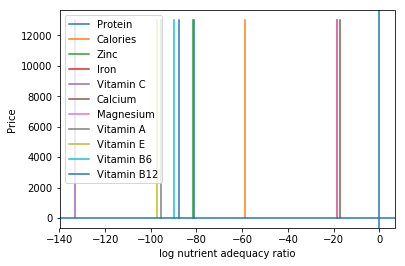

In [16]:
x = p.loc["Mangoes, Avocadoes And Other Fruits"]

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Mangoes, Avocadoes And Other Fruits')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Mangoes, Avocadoes And Other Fruits').values)

#lower right side is adequate nutriton. price. adequate protein, fat, iron, calcium. but calories deficient. 
#if we somehow lower price of dhal to 1, then we can get adequate nutrients.
#they are not going to eat just Dhal.



And varying the price of rice:



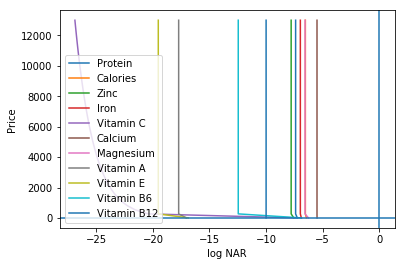

In [17]:
x = 280

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Ripe Bananas')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log NAR')
plt.axvline(0)
plt.axhline(p.sel(i='Ripe Bananas').values)

#inelastic for rice demand. even as price changes, if we double it to 4 rupees, it doesnt change much.
#Rice is prob not a good choice to target for policy design since its inelastic
 

